In [65]:
# Toronto Daily Shelter & Overnight Service Occupancy Capacity Analysis
# url: https://open.toronto.ca/dataset/daily-shelter-occupancy/

## Set Up

In [66]:
# Set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime


In [67]:
# Set seed for reproducibility
np.random.seed(44)

# Load Data Sets
data2022 = pd.read_csv("C:/Users/yyzhe/OneDrive/Documents/daily-shelter-overnight-service-occupancy-capacity-2022.csv")
data2023 = pd.read_csv("C:/Users/yyzhe/OneDrive/Documents/daily-shelter-overnight-service-occupancy-capacity-2023.csv")
data2024 = pd.read_csv("C:/Users/yyzhe/OneDrive/Documents/daily-shelter-overnight-service-occupancy-capacity-2024.csv")

## Data Cleaning ##

In [68]:
# Create 2024 shelter copy
shelter2024 = data2024.copy()
print(shelter2024.shape)


(48794, 32)


In [69]:
# Examine the 2024 data grains
example = shelter2024.iloc[0:5,:]
with pd.option_context('display.max_columns', None):
    print(example)
# Conclusion: Program_ID is the finest grain

   _id OCCUPANCY_DATE  ORGANIZATION_ID         ORGANIZATION_NAME  SHELTER_ID  \
0    1     2024-01-01               24  COSTI Immigrant Services          40   
1    2     2024-01-01               24  COSTI Immigrant Services          40   
2    3     2024-01-01               24  COSTI Immigrant Services          40   
3    4     2024-01-01               24  COSTI Immigrant Services          40   
4    5     2024-01-01               24  COSTI Immigrant Services          40   

            SHELTER_GROUP  LOCATION_ID               LOCATION_NAME  \
0  COSTI Reception Centre       1320.0   COSTI Hotel Program Dixon   
1  COSTI Reception Centre       1320.0   COSTI Hotel Program Dixon   
2  COSTI Reception Centre       1051.0      COSTI Reception Centre   
3  COSTI Reception Centre       1114.0  COSTI Uptown Hotel Program   
4  COSTI Reception Centre       1114.0  COSTI Uptown Hotel Program   

    LOCATION_ADDRESS LOCATION_POSTAL_CODE LOCATION_CITY LOCATION_PROVINCE  \
0      640 Dixon Rd. 

In [70]:
# Check 2023, 2022 data quality and append 

# Check shape
display("Year 2023 data shape:", data2023.shape)
display("Year 2022 data shape:", data2022.shape)

# Copy data
shelter2023 = data2023.copy()
shelter2022 = data2022.copy()

# Check data
print(shelter2024.head()) # Occupancy Date format 2024-01-01
print(shelter2023.head()) # Occupancy Date format 2023-01-01
print(shelter2022.head()) # Occupancy Date format 22-01-01
# Change date dtype
shelter2024['OCCUPANCY_DATE'] = pd.to_datetime(shelter2024['OCCUPANCY_DATE'])
shelter2023['OCCUPANCY_DATE'] = pd.to_datetime(shelter2023['OCCUPANCY_DATE'])
shelter2022['OCCUPANCY_DATE'] = pd.to_datetime(shelter2022['OCCUPANCY_DATE'], format = '%y-%m-%d')
# Check column names
columns2024 = shelter2024.columns
columns2023 = shelter2023.columns
columns2022 = shelter2022.columns
display("New columns in year 2023 is:", sum(~columns2023.isin(columns2024))) # 2023 columns are the same as 2024
display("New columns in year 2022 is:", sum(~columns2022.isin(columns2024))) #2022 columns are the same as 2024



'Year 2023 data shape:'

(48345, 32)

'Year 2022 data shape:'

(49478, 32)

   _id OCCUPANCY_DATE  ORGANIZATION_ID         ORGANIZATION_NAME  SHELTER_ID  \
0    1     2024-01-01               24  COSTI Immigrant Services          40   
1    2     2024-01-01               24  COSTI Immigrant Services          40   
2    3     2024-01-01               24  COSTI Immigrant Services          40   
3    4     2024-01-01               24  COSTI Immigrant Services          40   
4    5     2024-01-01               24  COSTI Immigrant Services          40   

            SHELTER_GROUP  LOCATION_ID               LOCATION_NAME  \
0  COSTI Reception Centre       1320.0   COSTI Hotel Program Dixon   
1  COSTI Reception Centre       1320.0   COSTI Hotel Program Dixon   
2  COSTI Reception Centre       1051.0      COSTI Reception Centre   
3  COSTI Reception Centre       1114.0  COSTI Uptown Hotel Program   
4  COSTI Reception Centre       1114.0  COSTI Uptown Hotel Program   

    LOCATION_ADDRESS LOCATION_POSTAL_CODE  ... OCCUPIED_BEDS UNOCCUPIED_BEDS  \
0      640 Dixon R

'New columns in year 2023 is:'

np.int64(0)

'New columns in year 2022 is:'

np.int64(0)

### Create combined shelter dataset ###

In [71]:
# Append to Shelter2024
shelter = pd.concat([shelter2022, shelter2023, shelter2024], ignore_index = True, verify_integrity = True)
display("Combined year 2022, 2023, 2024 data sets shape is:", shelter.shape)

'Combined year 2022, 2023, 2024 data sets shape is:'

(146617, 32)

### Check and clean shelter data set datatype

In [72]:
# Change data types
# Use apply(lambda x) because round(0) or int() won't remove .0 decimal
shelter['LOCATION_ID'] = shelter['LOCATION_ID'].apply(lambda x: format(float(x),'.0f')).astype('category')
shelter['SHELTER_ID'] = shelter['SHELTER_ID'].apply(lambda x: format(float(x),'.0f')).astype('category')
shelter['PROGRAM_ID'] = shelter['PROGRAM_ID'].apply(lambda x: format(float(x),'.0f')).astype('category')
shelter['ORGANIZATION_ID'] = shelter['ORGANIZATION_ID'].apply(lambda x: format(float(x),'.0f')).astype('category')
shelter['OCCUPANCY_DATE'] = pd.to_datetime(shelter['OCCUPANCY_DATE'], format = 'mixed')

# Add year, month, day columns
shelter['Year'] = shelter['OCCUPANCY_DATE'].dt.year
shelter['Month'] = shelter['OCCUPANCY_DATE'].dt.month
shelter['Date'] = shelter['OCCUPANCY_DATE'].dt.day

In [73]:
# Sanity check
print(shelter.dtypes)

_id                                int64
OCCUPANCY_DATE            datetime64[ns]
ORGANIZATION_ID                 category
ORGANIZATION_NAME                 object
SHELTER_ID                      category
SHELTER_GROUP                     object
LOCATION_ID                     category
LOCATION_NAME                     object
LOCATION_ADDRESS                  object
LOCATION_POSTAL_CODE              object
LOCATION_CITY                     object
LOCATION_PROVINCE                 object
PROGRAM_ID                      category
PROGRAM_NAME                      object
SECTOR                            object
PROGRAM_MODEL                     object
OVERNIGHT_SERVICE_TYPE            object
PROGRAM_AREA                      object
SERVICE_USER_COUNT                 int64
CAPACITY_TYPE                     object
CAPACITY_ACTUAL_BED              float64
CAPACITY_FUNDING_BED             float64
OCCUPIED_BEDS                    float64
UNOCCUPIED_BEDS                  float64
UNAVAILABLE_BEDS

### Check shelter data set missing values ###

In [74]:
# Check missing value
shelter.isnull().sum()/shelter.shape[0] 

# Conclude:Shelter Group, Location_ID, Location_Name, Location Address, Postal, City, Province have some missing data
# Conclude: Organization ID, Shelter ID, Program ID have no missing values
# Conclude: missing values in BED and ROOM are reciprocal and add up to 1, meaning no row has both missing values in BED and ROOM

_id                       0.000000
OCCUPANCY_DATE            0.000000
ORGANIZATION_ID           0.000000
ORGANIZATION_NAME         0.000000
SHELTER_ID                0.000000
SHELTER_GROUP             0.001473
LOCATION_ID               0.000000
LOCATION_NAME             0.007898
LOCATION_ADDRESS          0.033891
LOCATION_POSTAL_CODE      0.033714
LOCATION_CITY             0.033952
LOCATION_PROVINCE         0.033952
PROGRAM_ID                0.000000
PROGRAM_NAME              0.000000
SECTOR                    0.000000
PROGRAM_MODEL             0.000000
OVERNIGHT_SERVICE_TYPE    0.000000
PROGRAM_AREA              0.000000
SERVICE_USER_COUNT        0.000000
CAPACITY_TYPE             0.000000
CAPACITY_ACTUAL_BED       0.320058
CAPACITY_FUNDING_BED      0.320058
OCCUPIED_BEDS             0.320058
UNOCCUPIED_BEDS           0.320058
UNAVAILABLE_BEDS          0.320058
CAPACITY_ACTUAL_ROOM      0.679942
CAPACITY_FUNDING_ROOM     0.679942
OCCUPIED_ROOMS            0.679942
UNOCCUPIED_ROOMS    

### Investigate the data grains

#### Conclusion: there are 205 unique program IDs, and 205 unique combiniations of organization names and program IDs, therefore program ID is the finest grain in the data structure
#### The dataset has some quality issues: 70 Shelter_ID vs. 69 Shelter_Group, 125 Location_ID vs. 144 Location_Name

In [75]:
# How many organizations by ID
print('ORGANZIATION_ID')
print(shelter['ORGANIZATION_ID'].nunique(),'\n')
# How many organizations by name
print('ORGANIZATION_NAME')
print(shelter['ORGANIZATION_NAME'].nunique(), '\n')
# How many shelter groups by ID
print('SHELTER_ID')
print(shelter['SHELTER_ID'].nunique(),'\n')
print('SHELTER_GROUP')
# How many shelter groups by name
print(shelter['SHELTER_GROUP'].nunique(),'\n')
# How many shelter locations by ID
print('LACATION_ID')
print(shelter['LOCATION_ID'].nunique(),'\n')
# How many shelter locations by name
print('LOCATION_NAME')
print(shelter['LOCATION_NAME'].nunique(),'\n')
# How many programs by ID
print('PROGRAM_ID')
print(shelter['PROGRAM_ID'].nunique(),'\n')
# How many unique organization name and organization ID combinations
print('Organization name and organization ID combinations')
print(shelter[['ORGANIZATION_NAME','ORGANIZATION_ID']].drop_duplicates().shape[0], '\n')
print('Organization name and shelter ID combinations')
print(shelter[['ORGANIZATION_NAME','SHELTER_ID']].drop_duplicates().shape[0], '\n')
print('Organization ID and program ID combinations', '\n')
print(shelter[['ORGANIZATION_NAME','PROGRAM_ID']].drop_duplicates().shape[0])
# Conclude: program ID is the finest grain, organization ID is the top hierarchy

ORGANZIATION_ID
37 

ORGANIZATION_NAME
37 

SHELTER_ID
70 

SHELTER_GROUP
69 

LACATION_ID
125 

LOCATION_NAME
144 

PROGRAM_ID
205 

Organization name and organization ID combinations
37 

Organization name and shelter ID combinations
70 

Organization ID and program ID combinations 

205


#### Which SHELTER_GROUP (i.e. shelter name) is missing SHELTER_ID

In [76]:
shelter_ID_GROUP_unique = shelter[['SHELTER_ID', 'SHELTER_GROUP']].drop_duplicates().sort_values('SHELTER_GROUP')
# show all rows
with pd.option_context('display.max_rows', None):
    print(shelter_ID_GROUP_unique)

       SHELTER_ID                     SHELTER_GROUP
48             80    351 Lakeshore Respite Services
12             53                Birkdale Residence
0              40            COSTI Reception Centre
112340         98                Canadian Red Cross
7              22   Christie Ossington Men's Hostel
11             39   Christie Refugee Welcome Centre
43             21                 Cornerstone Place
44             20                    Covenant House
49              9       Dixon Hall - Heyworth House
54             14          Dixon Hall - Schoolhouse
15             60                   Downsview Dells
94             12      Eagles Nest Transition House
55             19                     Eva's Phoenix
56             18                       Eva's Place
16             83                  Expansion  Sites
60             58  FV Women's Transition to Housing
18              2                  Family Residence
58             41   Fife House Transitional Program
23          

#### Shelter ID 91 is missing shelter group name. Based on missing values of other columns, Shelter ID 91 have valuable information.

In [77]:
# Check shelter 91 rows
shelter_91 = shelter.loc[shelter['SHELTER_ID'] == '91']
shelter_91.isnull().sum()/shelter_91.shape[0]

_id                       0.000000
OCCUPANCY_DATE            0.000000
ORGANIZATION_ID           0.000000
ORGANIZATION_NAME         0.000000
SHELTER_ID                0.000000
SHELTER_GROUP             1.000000
LOCATION_ID               0.000000
LOCATION_NAME             0.000000
LOCATION_ADDRESS          0.000000
LOCATION_POSTAL_CODE      0.000000
LOCATION_CITY             0.000000
LOCATION_PROVINCE         0.000000
PROGRAM_ID                0.000000
PROGRAM_NAME              0.000000
SECTOR                    0.000000
PROGRAM_MODEL             0.000000
OVERNIGHT_SERVICE_TYPE    0.000000
PROGRAM_AREA              0.000000
SERVICE_USER_COUNT        0.000000
CAPACITY_TYPE             0.000000
CAPACITY_ACTUAL_BED       0.361111
CAPACITY_FUNDING_BED      0.361111
OCCUPIED_BEDS             0.361111
UNOCCUPIED_BEDS           0.361111
UNAVAILABLE_BEDS          0.361111
CAPACITY_ACTUAL_ROOM      0.638889
CAPACITY_FUNDING_ROOM     0.638889
OCCUPIED_ROOMS            0.638889
UNOCCUPIED_ROOMS    

## Descriptive Analytics

#### City of Toronto has the most shelter locations

In [78]:
# Which organization has most locations
# Use location IDs because it doesn't have missing values
org_loc = shelter.groupby(['ORGANIZATION_NAME'], observed = True)\
    .agg(LocationID_Count = ('LOCATION_ID', 'nunique')).sort_values(by='LocationID_Count', ascending = False).head(3)
print(org_loc)

                     LocationID_Count
ORGANIZATION_NAME                    
City of Toronto                    27
Homes First Society                13
Dixon Hall                         11


#### City of Toronto has the most shelter programs

In [79]:
# Which organization has most programs
org_prog = shelter.groupby('ORGANIZATION_NAME').agg(ProgramID_Count= ('PROGRAM_ID', 'nunique'))\
                                                    .sort_values(by = 'ProgramID_Count', ascending = False).head(3)
print(org_prog)

                     ProgramID_Count
ORGANIZATION_NAME                   
City of Toronto                   48
Homes First Society               29
Dixon Hall                        13


### What is current shelter capacity in Toronto? 

#### What is the measurement of capacity? If the measurement is CAPACITY_FUNDING_ROOM AND CAPACITY_FUNDING_BED, do they have consistent values?

#### Conclusion: capacity funding rooms and beds by PROGRAM_ID vary even during one year period. This determines how we roll capacity at program levels up to organization levels

In [80]:
# Do all programs have the same numbers of capacity funding rooms and beds from 2022 -2024
program_time = shelter.groupby(['Year', 'PROGRAM_ID'], observed = True)[['CAPACITY_FUNDING_ROOM', 'CAPACITY_FUNDING_BED']].nunique().reset_index()
# In year 2022
print('In year 2022')
program_2022 = program_time[program_time['Year'] == 2022]
print(program_2022[program_2022['CAPACITY_FUNDING_ROOM'] >1].shape[0]/program_2022.shape[0])
print(program_2022[program_2022['CAPACITY_FUNDING_BED'] >1].shape[0]/program_2022.shape[0])
# In year 2023
print('In year 2023')
program_2023 = program_time[program_time['Year'] == 2023]
print(program_2023[program_2023['CAPACITY_FUNDING_ROOM'] >1].shape[0]/program_2023.shape[0])
print(program_2023[program_2023['CAPACITY_FUNDING_BED'] >1].shape[0]/program_2023.shape[0])
# In year 2024
print('In year 2024')
program_2024 = program_time[program_time['Year'] == 2024]
print(program_2024[program_2024['CAPACITY_FUNDING_ROOM'] >1].shape[0]/program_2024.shape[0])
print(program_2024[program_2024['CAPACITY_FUNDING_BED'] >1].shape[0]/program_2024.shape[0])

In year 2022
0.1686746987951807
0.45180722891566266
In year 2023
0.05660377358490566
0.39622641509433965
In year 2024
0.08280254777070063
0.1337579617834395


### Total shelter capacity in Toronto: 5323 beds and 3070 rooms in 2024

In [81]:
# Total shelter capacity
program_capacity = shelter.groupby(['Year', 'ORGANIZATION_NAME','PROGRAM_ID'], observed = True)\
    [['CAPACITY_FUNDING_BED', 'CAPACITY_FUNDING_ROOM']].mean().reset_index() # use base mean() which excludes nan
total_capacity = program_capacity.groupby('Year')[['CAPACITY_FUNDING_BED', 'CAPACITY_FUNDING_ROOM']].sum().round().reset_index()
print('bed and room capacity:')
print(total_capacity)


bed and room capacity:
   Year  CAPACITY_FUNDING_BED  CAPACITY_FUNDING_ROOM
0  2022                4021.0                 3945.0
1  2023                5208.0                 3478.0
2  2024                5323.0                 3070.0


#### From 2022 to 2024, City of Toronto, Home First Society and COSTI Immigrant Services have the  most capacity funding rooms.

In [82]:
# Sorting (reset_index(drop=True) dropping old index to retain clean dataframe after modification)
organization_capacity = program_capacity.groupby(['Year', 'ORGANIZATION_NAME'], observed = True)\
    [['CAPACITY_FUNDING_BED', 'CAPACITY_FUNDING_ROOM']].sum().round().reset_index()

t5_rooms = organization_capacity[['Year', 'ORGANIZATION_NAME','CAPACITY_FUNDING_ROOM']]\
    .sort_values( by = ['Year','CAPACITY_FUNDING_ROOM'], ascending = [True, False]).reset_index(drop=True)

print('top 5 organizations with largest capacity rooms in 2022')
print(t5_rooms[t5_rooms['Year']==2022].head(5))
print('top 5 organizations with largest capacity rooms in 2023')
print(t5_rooms[t5_rooms['Year']==2023].head(5))
print('top 5 organizations with largest capacity rooms in 2024')
print(t5_rooms[t5_rooms['Year']==2024].head(5))


top 5 organizations with largest capacity rooms in 2022
   Year             ORGANIZATION_NAME  CAPACITY_FUNDING_ROOM
0  2022               City of Toronto                  980.0
1  2022           Homes First Society                  807.0
2  2022      COSTI Immigrant Services                  446.0
3  2022  The Salvation Army of Canada                  425.0
4  2022                    Dixon Hall                  375.0
top 5 organizations with largest capacity rooms in 2023
    Year             ORGANIZATION_NAME  CAPACITY_FUNDING_ROOM
35  2023               City of Toronto                  887.0
36  2023           Homes First Society                  599.0
37  2023      COSTI Immigrant Services                  439.0
38  2023                    Dixon Hall                  290.0
39  2023  The Salvation Army of Canada                  275.0
top 5 organizations with largest capacity rooms in 2024
    Year             ORGANIZATION_NAME  CAPACITY_FUNDING_ROOM
70  2024               City of T

#### From 2022 to 2024, Home First Society, City of Toronto and The Salvation Army of Canada have the most capacity funding beds

In [83]:
t5_beds = organization_capacity[['Year', 'ORGANIZATION_NAME','CAPACITY_FUNDING_BED']]\
    .sort_values( by = ['Year','CAPACITY_FUNDING_BED'], ascending = [True, False]).reset_index(drop=True)

print('top 5 organizations with largest capacity beds in 2022')
print(t5_beds[t5_beds['Year']==2022].head(5))
print('top 5 organizations with largest capacity rooms in 2023')
print(t5_beds[t5_beds['Year']==2023].head(5))
print('top 5 organizations with largest capacity rooms in 2024')
print(t5_beds[t5_beds['Year']==2024].head(5))

top 5 organizations with largest capacity beds in 2022
   Year             ORGANIZATION_NAME  CAPACITY_FUNDING_BED
0  2022           Homes First Society                1094.0
1  2022               City of Toronto                 913.0
2  2022  The Salvation Army of Canada                 439.0
3  2022            Fred Victor Centre                 275.0
4  2022                    Dixon Hall                 210.0
top 5 organizations with largest capacity rooms in 2023
    Year             ORGANIZATION_NAME  CAPACITY_FUNDING_BED
35  2023           Homes First Society                1425.0
36  2023               City of Toronto                 876.0
37  2023  The Salvation Army of Canada                 530.0
38  2023            Fred Victor Centre                 502.0
39  2023                    Dixon Hall                 422.0
top 5 organizations with largest capacity rooms in 2024
    Year             ORGANIZATION_NAME  CAPACITY_FUNDING_BED
70  2024           Homes First Society        

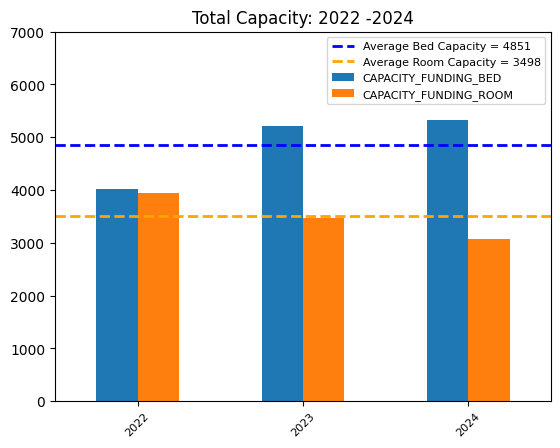

In [84]:
fig=total_capacity.plot(x='Year', kind = 'bar')
fig.set_title('Total Capacity: 2022 -2024')
for label in fig.get_xticklabels():
    label.set_rotation(45)
avg_bed = total_capacity['CAPACITY_FUNDING_BED'].mean()
avg_room = total_capacity['CAPACITY_FUNDING_ROOM'].mean()
plt.axhline(y=avg_bed, color='blue', linestyle='--', linewidth=2, label=f'Average Bed Capacity = {avg_bed:.0f}') # add a horizontal line
plt.axhline(y=avg_room, color = 'orange', linestyle = '--', linewidth=2, label=f'Average Room Capacity = {avg_room:.0f}') # add another horizontal line
plt.ylim(0,7000) # resize y axis 
plt.legend(fontsize= 8) # change legend fontsize
plt.xticks(fontsize=8) # change xticks label fontsize
fig.set_xlabel("")
plt.show()

#### The City of Toronto has far more shelter capacity. Other GTA areas have room to build more shelter capacity.

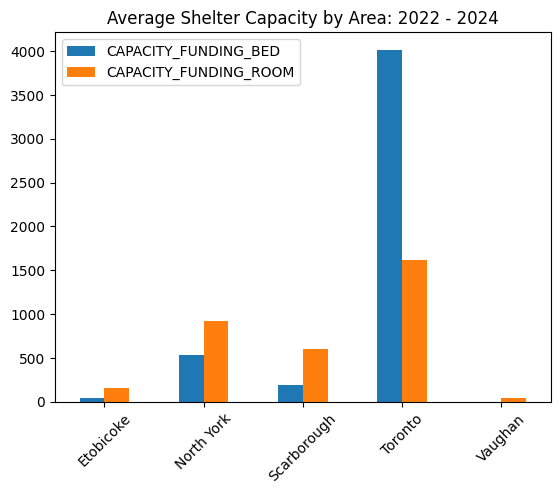

In [85]:
city_capacity= shelter.groupby(['Year', 'PROGRAM_ID', 'LOCATION_CITY'], observed=True)[['CAPACITY_FUNDING_BED', 'CAPACITY_FUNDING_ROOM']]\
    .mean().reset_index()

city_capacity=city_capacity.groupby(['Year', 'LOCATION_CITY'], observed=True)[['CAPACITY_FUNDING_BED', 'CAPACITY_FUNDING_ROOM']]\
    .sum().round(0).reset_index()
city_capacity=city_capacity.groupby('LOCATION_CITY', observed=True)[['CAPACITY_FUNDING_BED', 'CAPACITY_FUNDING_ROOM']].mean().round(0).reset_index()

fig=city_capacity.plot(x='LOCATION_CITY', kind='bar')
fig.set_title('Average Shelter Capacity by Area: 2022 - 2024')
fig.set_xlabel('')
for label in fig.get_xticklabels():
    label.set_rotation(45)
plt.show()

#### Of the shelter capacity, 70% is bed-based capacity and 30% room-based capacity.

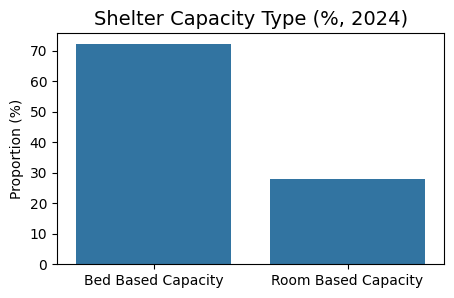

In [86]:
# Capacity type
ctype_ndup = shelter2024[['LOCATION_ID', 'CAPACITY_TYPE']].drop_duplicates()
ctype_prop = ctype_ndup['CAPACITY_TYPE'].value_counts().reset_index()
ctype_prop.columns = ['CAPACITY_TYPE', 'Count']
ctype_prop['Proportion'] = ctype_prop['Count']/ctype_prop['Count'].sum()*100
# Create a bar chart
plt.figure(figsize=(5, 3))
ax = sns.barplot(
    data=ctype_prop,
    x='CAPACITY_TYPE',
    y='Proportion'
)

plt.title("Shelter Capacity Type (%, 2024)", fontsize=14)
plt.xlabel("", fontsize = 10)
plt.ylabel("Proportion (%)", fontsize=10)
plt.xticks(rotation=0)
plt.show()


#### The city provides a variety of shelter types, with overnight shelter the majority type.

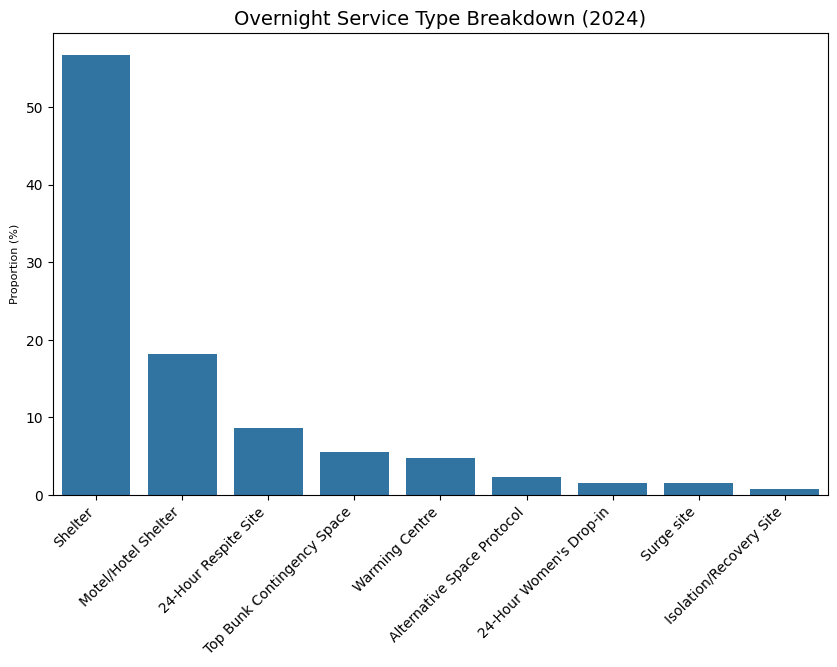

In [87]:
# Overnight Service Type
os_ndup = shelter2024[['LOCATION_ID', 'OVERNIGHT_SERVICE_TYPE']].drop_duplicates()
os_prop = os_ndup['OVERNIGHT_SERVICE_TYPE'].value_counts().reset_index()
os_prop.columns = ['OVERNIGHT_SERVICE_TYPE', 'Count']
os_prop['Proportion'] = os_prop['Count']/os_prop['Count'].sum()*100

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=os_prop,
    x='OVERNIGHT_SERVICE_TYPE',
    y='Proportion'
)

plt.title("Overnight Service Type Breakdown (2024)", fontsize=14)
plt.xlabel("", fontsize = 8)
plt.ylabel("Proportion (%)", fontsize=8)
plt.xticks(rotation=45, ha="right") # ha is to align the label to xtick
plt.show()

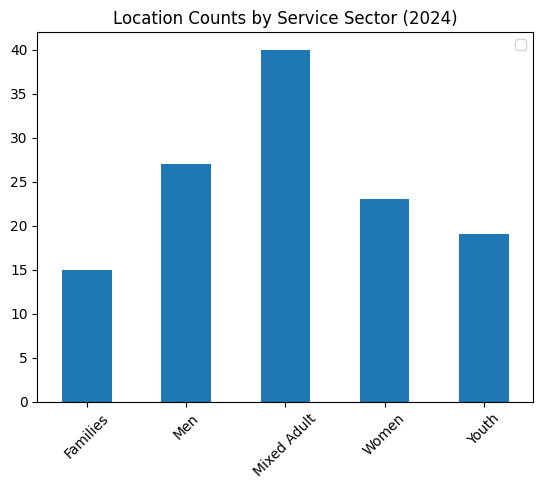

In [88]:
# Sector breakdown
sector_ndup = shelter2024[['LOCATION_ID', 'SECTOR']].drop_duplicates().reset_index()
sector = sector_ndup.groupby(by='SECTOR')['LOCATION_ID'].count().reset_index()
fig=sector.plot(x='SECTOR', kind='bar')
plt.title('Location Counts by Service Sector (2024)')
plt.xlabel("")
plt.legend("") # remove legend
for label in fig.get_xticklabels():
    label.set_rotation(45)
plt.show()

#### Then how many people have used shelters? As the service user count attribute doesn't differentiate unique users and we lack the information about length of stays, daily user count seems to be a reasonable estimate of demand on a daily basis
#### Shelter user counts have risen drastically since 2022

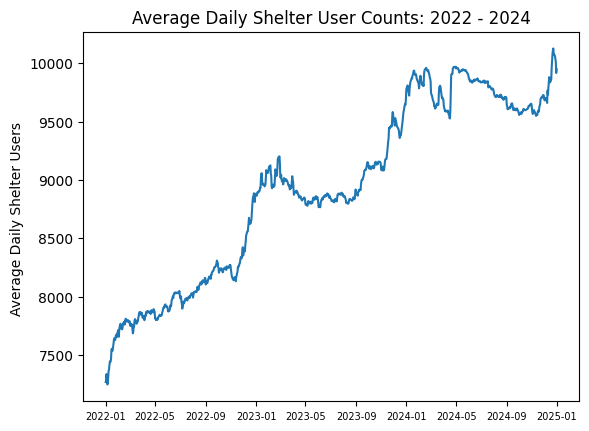

In [93]:
# Average daily unique user counts
daily_users = shelter.groupby(['OCCUPANCY_DATE', 'Year'], observed = True)['SERVICE_USER_COUNT']\
    .agg(daily_users = lambda x: x.sum()).reset_index()

plt.plot(daily_users['OCCUPANCY_DATE'], daily_users['daily_users'])

plt.xlabel('')
plt.ylabel('Average Daily Shelter Users ')
plt.xticks(fontsize=7)
plt.title('Average Daily Shelter User Counts: 2022 - 2024')
plt.show()

#### Shelter needs rose significantly over the 3-year period of 2022 - 2024
#### Three-year average shelter occupancy rates hover above 97%

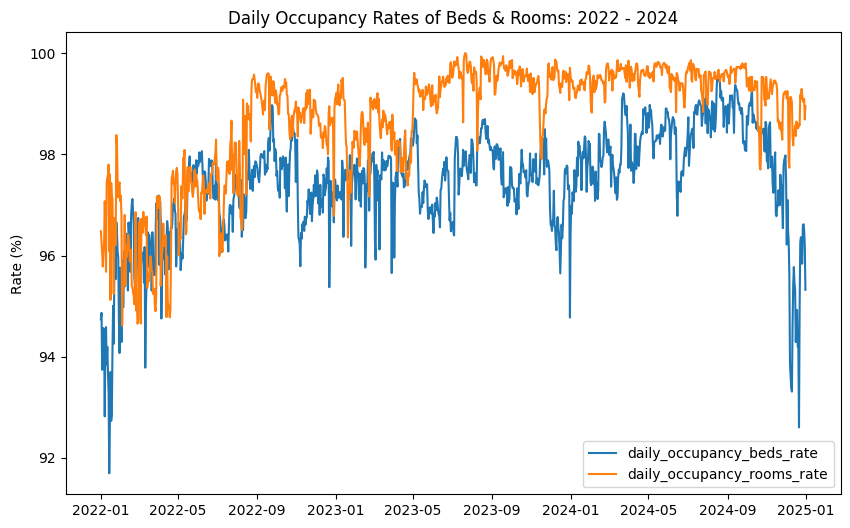

In [90]:
# What are the occupancy rates by month
daily_or = shelter[['OCCUPANCY_DATE', 'OCCUPANCY_RATE_BEDS', 'OCCUPANCY_RATE_ROOMS']]\
    .groupby(by='OCCUPANCY_DATE').agg(daily_occupancy_beds_rate = ('OCCUPANCY_RATE_BEDS', 'mean')\
                                      , daily_occupancy_rooms_rate = ('OCCUPANCY_RATE_ROOMS', 'mean')).reset_index()
beds_rate_3yr_avg = daily_or['daily_occupancy_beds_rate'].mean().round(2)
rooms_rate_3yr_avg = daily_or['daily_occupancy_rooms_rate'].mean().round(2)
#daily_or.plot()
plt.figure(figsize=(10,6)) # adjust figure size
plt.plot(daily_or['OCCUPANCY_DATE'], daily_or[['daily_occupancy_beds_rate', 'daily_occupancy_rooms_rate']]) # use [[.]] to plot two or more lines
plt.title('Daily Occupancy Rates of Beds & Rooms: 2022 - 2024')
plt.xlabel('')
plt.ylabel('Rate (%)')
plt.legend(['daily_occupancy_beds_rate', 'daily_occupancy_rooms_rate'])
plt.show()

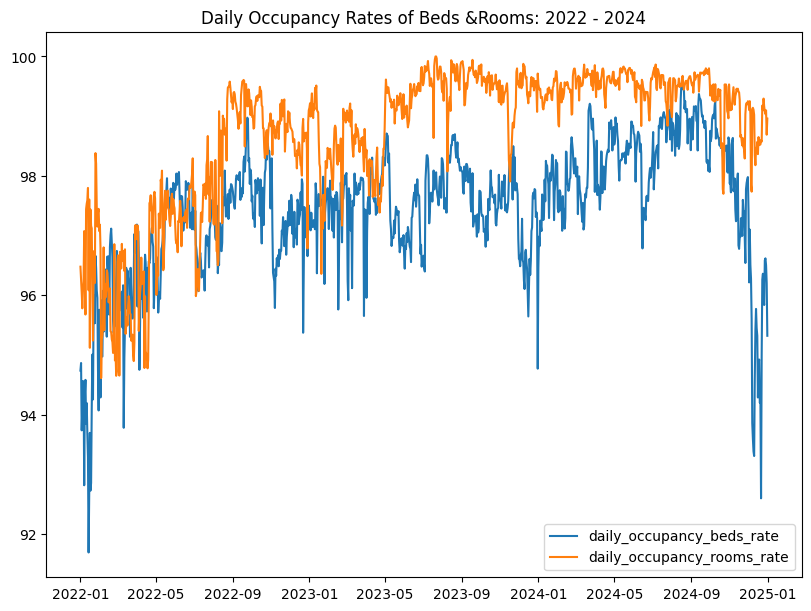

In [91]:
# Plot using Axes
fig, ax = plt.subplots(figsize=(8,6), layout="constrained")
ax.plot(daily_or['OCCUPANCY_DATE'], daily_or[['daily_occupancy_beds_rate', 'daily_occupancy_rooms_rate']])
ax.set_title("Daily Occupancy Rates of Beds &Rooms: 2022 - 2024")
ax.legend(['daily_occupancy_beds_rate', 'daily_occupancy_rooms_rate'])


### Shelters have high rates of unavailable beds and rooms between 2.5% - 10% from 2022 to 2024. Unavailability is due to maintenance and other reasons. Among historical high shelter demand, this is an area of improvement that the government should remedy in the near term.

Text(0, 0.5, 'Rate(%)')

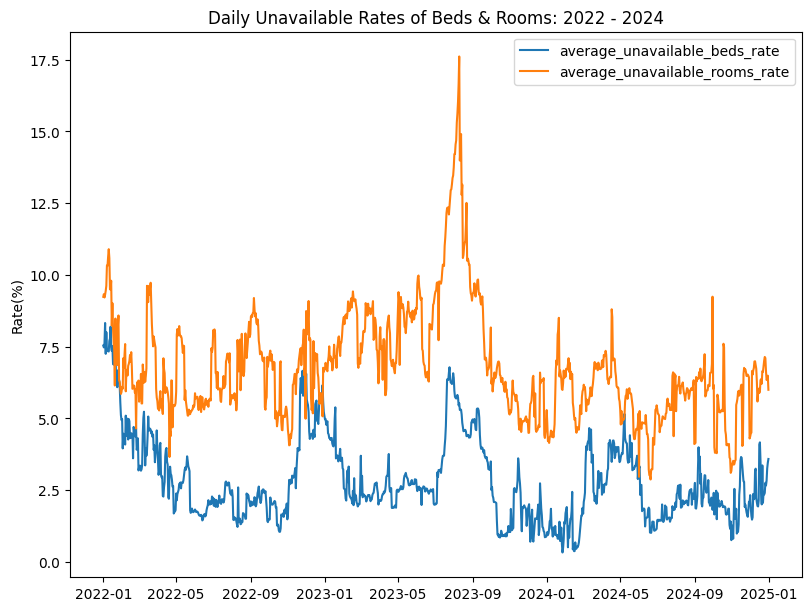

In [92]:
# What are available capacity vs. funding capacity
daily_unavailable= shelter.loc[:,['OCCUPANCY_DATE','UNAVAILABLE_BEDS', 'CAPACITY_FUNDING_BED', 'UNAVAILABLE_ROOMS', 'CAPACITY_FUNDING_ROOM']]
daily_unavailable['unavailable_beds_rate'] = daily_unavailable['UNAVAILABLE_BEDS']/daily_unavailable['CAPACITY_FUNDING_BED']*100
daily_unavailable['unavailable_rooms_rate']=daily_unavailable['UNAVAILABLE_ROOMS']/daily_unavailable['CAPACITY_FUNDING_ROOM']*100
daily_ur = daily_unavailable.groupby(['OCCUPANCY_DATE']).agg(average_unavailable_beds_rate=('unavailable_beds_rate', 'mean')\
    , average_unavailable_rooms_rate=('unavailable_rooms_rate', 'mean')).reset_index()

# Plot
fig, ax = plt.subplots(figsize=(8,6), layout="constrained")
ax.plot(daily_ur['OCCUPANCY_DATE'], daily_ur[['average_unavailable_beds_rate', 'average_unavailable_rooms_rate']])
ax.set_title("Daily Unavailable Rates of Beds & Rooms: 2022 - 2024")
ax.legend(['average_unavailable_beds_rate', 'average_unavailable_rooms_rate'])
ax.set_xlabel('')
ax.set_ylabel('Rate(%)')
